# Dense Coding

In [1]:
from qiskit import QuantumCircuit, execute, Aer

simulator = Aer.get_backend("qasm_simulator")

## Extend Bell generator and analyzer to 8 qubit system

The 8 qubit generator and analyzer allow us to directly encode a single character on our 8 qubit system. Alice creates 4 pairs of entangled particles with her Bell generator, sends the first particle from each pair to Bob, applies a set of operations to each of her remaining qubits encoding 2 classical bits of information, and then sends her remaining qubits to Bob. Upon receiving the final qubits, Bob runs each entangled pair through the Bell analyzer and makes a measurement of each system. The resulting classical bits equate to a single character of the message. This may not be a very practical solution to quantum communication but it is a fun program to play around with at the very least.

In [2]:
def bell_generator_8_qubit(circ):
    num_qubits = len(circ.qubits)
    circ.h(range(0, num_qubits, 2))
    circ.cx(range(0, num_qubits, 2), range(1, num_qubits, 2))
    circ.barrier()  # does nothing but make the circuit drawing look better

def bell_analyzer_8_qubit(circ):
    num_qubits = len(circ.qubits)
    circ.cx(range(0, num_qubits, 2), range(1, num_qubits, 2))
    circ.h(range(0, num_qubits, 2))
    circ.barrier()

def quantum_encode_char(circ, char):
    num_qubits = len(circ.qubits)
    char_bits = format(ord(char),'b').zfill(8)
    for i in range(0, num_qubits, 2):
        bs = char_bits[i:i+2]
        if bs == "01" or bs == "11":
            circuit.x(i+1)
        if bs == "10" or bs == "11":
            circuit.z(i+1)
    circuit.barrier()

## Simulate Dense Coding Exchange

In [3]:
# Set up a circuit to transmit one byte 
num_qubits = 8
num_bits = 8
circuit = QuantumCircuit(num_qubits, num_bits)

# Prepare secret message buffers
str_alice_sent = "shh it's a secret!"
str_bob_recieved = ''
print("Alice sent: ", str_alice_sent)

# Encode and send message
for char in str_alice_sent:  
    # Clear out the quantum circuit
    circuit.data = []
    
    # Alice generates entangled pairs of qubits
    bell_generator_8_qubit(circuit)
    
    # Alice encodes 2 classical bits to each pair
    quantum_encode_char(circuit, char)

    # Bob does a Bell measurement to get classical info
    bell_analyzer_8_qubit(circuit)
    circuit.measure(range(num_qubits), range(num_bits))

    # Execute the job with 10 shots since it shouldn't be noisy
    job = execute(circuit, simulator, shots=10)
    result = job.result()
    counts = result.get_counts()

    # Classical bits Bob sees are the most frequently measured values in counts
    classical_bits = max(counts,key=lambda x: counts[x])[::-1]  # Qiskit is little endian
    str_bob_recieved += chr(int(''.join(classical_bits), 2))

print("Bob received: ", str_bob_recieved)

Alice sent:  shh it's a secret!
Bob received:  shh it's a secret!


## Single character endcoding and decoding circuit

The left hand side shows Alice creating the entangled pairs via her 8 qubit Bell generator. Lacking the transmission and ong term storage system for the simulated qubits, we will have to imagine that Alice sent the first qubit of each pair to Bob. The next section shows her encoding the final character of the message on the qubits remaining in her possession. Again we are forced to imagine Alice transmitting the simulated qubits to Bob. The final two sections show Bob performing a Bell measurement on each of the pairs of entangled particles to reveal the final character Alice sent.

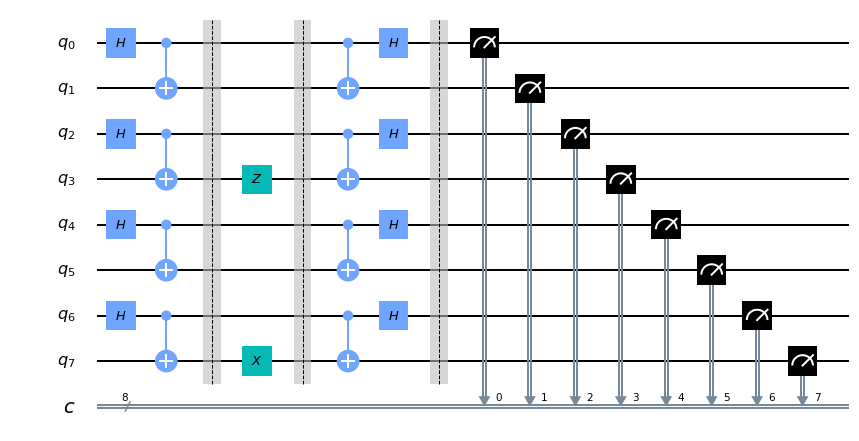

In [4]:
circuit.draw()